## IMDB review classification
The Large Movie Review Dataset (often referred to as the IMDB dataset) contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment.

The data was collected by Stanford researchers (http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf) and was used in a 2011 paper where a split of 50-50 of the data was used for training and test. An accuracy of 88.89% was achieved.

Keras provides access to the IMDB dataset built-in. The imdb.load_data() function allows you to load the dataset in a format that is ready for use in neural network and deep learning models.

The words have been replaced by integers that indicate the ordered frequency of each word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

####  Data preparation
* Load the IMDB dataset
* Keep only the top 5,000 words and change others to zero
* Trunate and pad the input sequences to the same length. 
* Split the dataset into train and teest sets

### Text Vectorization -  One-hot encoding
Text to tokens (or words) and then tokens to vectors - one-hot encoding and word embedding.

One-hot encoding . e.g : John learned Python. Joe learned R.  
Tokens = “John”, “learned”, “Python”, “Joe”, “R”

Vectors = (John = [1, 0, 0, 0, 0],  Learned= [0, 1, 0, 0, 0], Python = [0, 0, 1, 0, 0],  Joe = [0, 0, 0, 1, 0], R = [0, 0, 0, 0, 1])

Cons:  Sparse. Does not keep the related words close to each other. For example, in a sentence “I learned Python and R after trying out Matlab” the names of the programs should be close to each other in the vector space, but this is not the case with one-hot-encoding. 

### Text Vectorization -  Word Embedding

* Generate a random set of vectors. Tune these vectors to represent the set of words. 
* Use a pre-trained word embeddings such as word2vec, glove, etc. 
* Create a embedding layer and train it. This is advantageous when working on a specific domain application. 


In [1]:
# load the dataset but only keep the top n words, zero the rest
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence


top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


/projects/community/py-bigdata/2020/bd387/envs/py-dl/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/projects/community/py-bigdata/2020/bd387/envs/py-dl/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:

print(X_train.shape, 'train shape')
print(X_test.shape, 'test shape')

print("")
print(" Check some sequences ")
print(len(X_train[0]), len(X_train[1]))
print(X_train[0])

(25000,) train shape
(25000,) test shape

 Check some sequences 
218 189
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [3]:
#truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [4]:
print(X_train.shape, 'train shape')
print(X_test.shape, 'test shape')

print("")
print(" Check some sequences ")
print(len(X_train[0]), len(X_train[1]))
print(X_train[0])

(25000, 500) train shape
(25000, 500) test shape

 Check some sequences 
500 500
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  

#  LSTM model.

The first layer is Embedded layer. The next layer is LSTM with memory units (smart neurons that can store state information). The last layer is the dense ouput layer with sigmoid activation to produce binary values. 


Embedded layer
* Maps each word onto a 32 length real valued vector.
* Limits the total number of words to 5000 most frequent words

This is a binary classification problem. We will use binary_crossentropy. A few epochs are enough to avoid overfitting. 



In [5]:
# create the model
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense

embedding_vecor_length = 32
mem_units = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(mem_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
from matplotlib import pyplot as plt
def plot_acc_loss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')

    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()


Epoch 1/3
391/391 [==============================] - 133s 340ms/step - loss: 0.4352 - accuracy: 0.7944 - val_loss: 0.3104 - val_accuracy: 0.8702
Epoch 2/3
391/391 [==============================] - 126s 322ms/step - loss: 0.2730 - accuracy: 0.8941 - val_loss: 0.2994 - val_accuracy: 0.8761
Epoch 3/3
391/391 [==============================] - 118s 301ms/step - loss: 0.2277 - accuracy: 0.9132 - val_loss: 0.3093 - val_accuracy: 0.8790


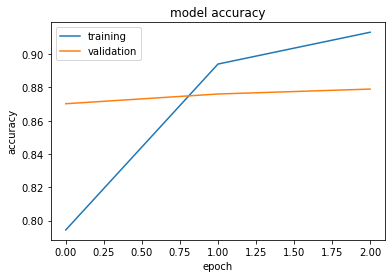

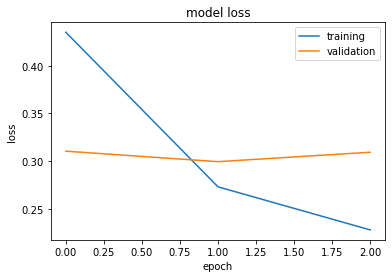

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
plot_acc_loss(history)


In [8]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: %.2f%%" % (scores[0]*100))
print("Test Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 37s 47ms/step - loss: 0.3093 - accuracy: 0.8790
Test Accuracy: 30.93%
Test Accuracy: 87.90%


#### Dropout


In [9]:
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(mem_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=512)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
49/49 [==============================] - 29s 596ms/step - loss: 0.6545 - accuracy: 0.6196
Epoch 2/3
49/49 [==============================] - 29s 594ms/step - loss: 0.4079 - accuracy: 0.8362
Epoch 3/3
49/49 [==============================] - 29s 594ms/step - loss: 0.2895 - accuracy: 0.8880
Accuracy: 87.75%


Epoch 1/3
391/391 [==============================] - 299s 766ms/step - loss: 0.3054 - accuracy: 0.8762 - val_loss: 0.3014 - val_accuracy: 0.8744
Epoch 2/3
391/391 [==============================] - 297s 760ms/step - loss: 0.2363 - accuracy: 0.9099 - val_loss: 0.2950 - val_accuracy: 0.8772
Epoch 3/3
391/391 [==============================] - 297s 760ms/step - loss: 0.2135 - accuracy: 0.9182 - val_loss: 0.3533 - val_accuracy: 0.8716


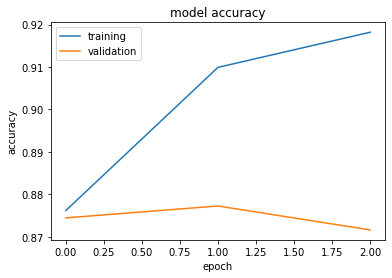

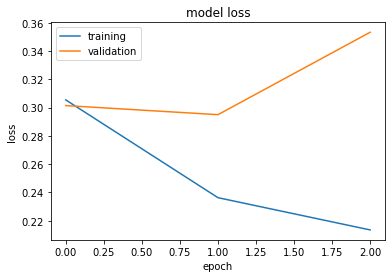

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
plot_acc_loss(history)


In [11]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: %.2f%%" % (scores[0]*100))
print("Test Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 46s 59ms/step - loss: 0.3533 - accuracy: 0.8716
Test Accuracy: 35.33%
Test Accuracy: 87.16%


#### Combining CNN and RNN

CNNs are good with learning the local structures. RNNs are good with keeping track of states. For some problems, it was found that the combinations work better than the individual model. 


In [12]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(mem_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 171,457
Trainable params: 171,457
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/3
391/391 [==============================] - 61s 157ms/step - loss: 0.4135 - accuracy: 0.7973 - val_loss: 0.3037 - val_accuracy: 0.8710
Epoch 2/3
391/391 [==============================] - 61s 155ms/step - loss: 0.2384 - accuracy: 0.9076 - val_loss: 0.2760 - val_accuracy: 0.8870
Epoch 3/3
391/391 [==============================] - 61s 155ms/step - loss: 0.1932 - accuracy: 0.9269 - val_loss: 0.3058 - val_accuracy: 0.8808


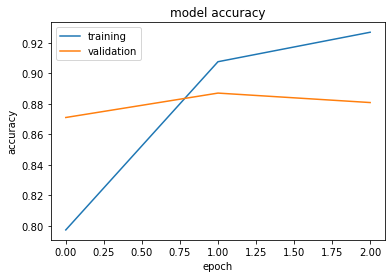

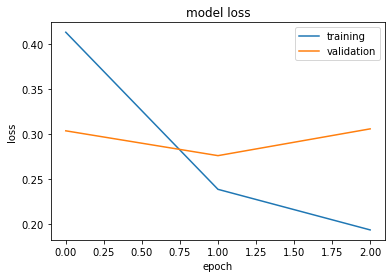

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
plot_acc_loss(history)

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: %.2f%%" % (scores[0]*100))
print("Test Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 24s 30ms/step - loss: 0.3058 - accuracy: 0.8808
Test Accuracy: 30.58%
Test Accuracy: 88.08%


In [15]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=512)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                512064    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [16]:


# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=512)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               4096256   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 4,256,513
Trainable params: 4,256,513
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
49/49 [==============================] - 1s 27ms/step - loss: 0.6573 - accuracy: 0.5987
Epoch 2/3
49/49 [==============================] - 1s 27ms/step - loss: 0.3070 - accuracy: 0.8729
Epoch 3/3
49/49 [========================

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout
max_review_length=500
mem_unit=32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(mem_unit))
#model.add(LSTM(mem_unit, dropout=0.2, recurrent_dropout=0.2))
#model.add(GlobalMaxPool1D())
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=512)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 169,409
Trainable params: 169,409
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
49/49 [==============================] - 31s 628ms/step - loss: 0.6481 - accuracy: 0.6379
Epoch 2/3
49/49 [==============================] - 31s 629ms/step - loss: 0.3887 - accuracy: 0.8436
Epoch 3/3
49/49 [========================